# Introduction

A international company would like to market products to customers that work or develop from home or remotely, half of their time or more, and would like to know what the probability of someone working remotely is depending on the country that they are from. During the Covid-19 Pandemic the concept of remote working or working from home was not as common as it became during the pandemic. How common was it? Was this a global trend or was it more common in North America?
The study takes the results from the Stack Overflow survey and breaks it down per 10 countries from 5 different continents.

## 1 Business Understanding

Question 1 Before the Covid-19 Pandemic, the concept of remote working was not as common as it became during the pandemic. How common was it?

Question 2 Does the country or continent's culture have an impact on the percentage of respondents that work from home. Was this a global trend or was it more common in North America?

Question 3 Are the countries in Western Europe, Sweden, France, Italy, etc. less likely than a world average to allow workers to work remotely or from home?

Question 4 Are Employment Status and Company Size indicators for working remotely?

# 2 Data Understanding

First, we gather the data from from the necessary files.

In [435]:
#We import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline
import patsy


'''
    INPUT - A shortened Excel spreadsheet of the responses from the Stack overflow survey
            
    OUTPUT - df - pandas dataframe of the responses from the Stack overflow survey
             df_emp_filt - A filtered dataframe that contains respondents that are employed or freelance
    '''
#Create a dataframe, one main table from the Excel sheet
df = pd.read_excel('C:\\Users\\vdwaltjl\\OneDrive - Vodafone Group\\General\\Training and Studies\\Udacity Data Science\\survey-results-public_short.xlsx')

Now that we have our data in a dataframe, we have to understand it. Let's look at the first 5 lines.

In [436]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,9 to 10 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,20 or more years,20 or more years,NaN,Other,NaN,NaN,NaN,8.0,9.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,14 to 15 years,9 to 10 years,NaN,NaN,NaN,NaN,Data scientist,6.0,3.0,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,20 or more years,10 to 11 years,NaN,Mobile developer,NaN,NaN,NaN,NaN,NaN,NaN


Let us have a look how many rows and columns our dataframe has.

In [437]:
df.shape

(51392, 21)

We take a look at our dataframe with df.describe() to see which columns are numerical, seeing that we need to know which columns can be used for our model at the end of the study. A machine learning model can only work with numerical columns without NA rows.

In [438]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction
count,51392.000000,21792.000000,20078.000000
mean,25696.500000,7.161757,6.869409
std,14835.736854,2.025726,2.194320
min,1.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000
50%,25696.500000,7.000000,7.000000
75%,38544.250000,8.000000,8.000000
max,51392.000000,10.000000,10.000000


We have a look at the info of the dataframe and we notice that there are data missing from the main three columns that will be used for the study. HomeRemote, EmploymentStatus and CompanySize, do not have the full 51392 rows, but Country and EmploymentStatus have.

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Respondent           51392 non-null  int64  
 1   Professional         51392 non-null  object 
 2   ProgramHobby         51392 non-null  object 
 3   Country              51392 non-null  object 
 4   University           51392 non-null  object 
 5   EmploymentStatus     51392 non-null  object 
 6   FormalEducation      51392 non-null  object 
 7   MajorUndergrad       42841 non-null  object 
 8   HomeRemote           44008 non-null  object 
 9   CompanySize          38922 non-null  object 
 10  CompanyType          38823 non-null  object 
 11  YearsProgram         51145 non-null  object 
 12  YearsCodedJob        40890 non-null  object 
 13  YearsCodedJobPast    974 non-null    object 
 14  DeveloperType        36125 non-null  object 
 15  WebDeveloperType     10688 non-null 

What percentage of the data is missing in the columns?  This will help us decide whether a full column can be dropped. Below we notice that HomeRemote has 14.367% missing. None of the columns that we are looking at have enough data missing for us to drop it.

In [440]:
#We use the isnull method to determine the amount of NA rows and divide it by the total amount of rows 
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing[:10]

Respondent           0.000000
Professional         0.000000
ProgramHobby         0.000000
Country              0.000000
University           0.000000
EmploymentStatus     0.000000
FormalEducation      0.000000
MajorUndergrad      16.638776
HomeRemote          14.367995
CompanySize         24.264477
dtype: float64

The next step is to remove the respondents that are not employed or retired. It's not advisable to drop rows, but in this case the data is not applicable. Someone that is retired and working from home, is not in scope for this requirement.
We don't filter out all the N/A responses, seeing that there are respondents in the group that are employed, and removing them could make the results inacurate. We should look at filling those values for our model.

In [441]:
#We filter out the retired and unemployed and create a new dataframe, df_emp_filt 
df_emp_filt = df[df.EmploymentStatus.isin(["Independent contractor, freelancer, or self-employed","Employed full-time","Employed part-time"])]

We run the missing percent query again and we look at the results.

In [442]:
percent_missing = df_emp_filt.isnull().sum() * 100 / len(df_emp_filt)
percent_missing[:10]

Respondent           0.000000
Professional         0.000000
ProgramHobby         0.000000
Country              0.000000
University           0.000000
EmploymentStatus     0.000000
FormalEducation      0.000000
MajorUndergrad      10.971477
HomeRemote           1.267925
CompanySize         12.665784
dtype: float64

From the query above we can notice that missing percentage of the HomeRemote column is now down to 1.26 percent. We will see in the next section how we will handle this 1.26 percent. 


# 3. Prepare the data

To clean and prepare the data, a new column will be created in the dataframe that will be updated from another columnbased on a condition.

We divide the respondents into two:
    1) 'Half and more' is in one category, and
    2)  the rest in 'Less than half'

NA will be counted as less than half (which we saw above is only 1.26%), seeing that the question is: "How often do you work from home or remotely?". A N/A response will be accepted as no remote working at all and placed in the second category, and will therefore be imputed with "Less than half". 

We will call this column 'Remote Percent' which will refer to the percentage of time working remotely. We will use this column during our study instead of 'HomeRemote'.

We create an empty list to which we append with the new descriptions:

In [396]:
'''
    INPUT  - df - pandas dataframe with the responses from the Stack overflow survey
             column_name - HomeRemote - The respons e to the question: "How often do you work from home or remotely?""
    OUTPUT - Remote_percent - the name of the new column with the strings that divides 
             the 'HomeRemote'responses into two categories
    '''
Remote_perc = []
for percentage in df_emp_filt['HomeRemote']:
    if percentage in ("About half the time",
        "All or almost all the time (I'm full-time remote)",
        "More than half, but not all, the time") : Remote_perc.append('Half and more')
        
    else:   Remote_perc.append ('Less than half')

In [453]:
#Remote_perc

The next step is to update the new column 'Remote_percent' with the new values. A warning is given, but the column is updated correctly.

In [450]:
df_emp_filt['Remote_percent'] = Remote_perc

<ipython-input-450-c7a12b84832d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emp_filt['Remote_percent'] = Remote_perc


# 4. Evaluation

# Question 1

Before the Covid-19 Pandemic, the concept of remote working was not as common as it became during the pandemic. How common was it?

To prepare the data, a new column will be created in the dataframe that will be updated from another column.

We run the analysis on the numbers with the 'value_counts' function and express it as a percentage:

In [454]:
df_emp_filt['Remote_percent'].value_counts(normalize=True).mul(100)

Less than half    80.752227
Half and more     19.247773
Name: Remote_percent, dtype: float64

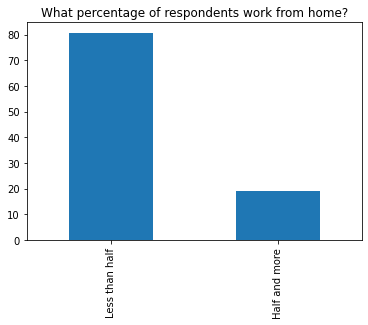

In [455]:
df_emp_filt['Remote_percent'].value_counts(normalize=True).mul(100).plot(kind='bar');
plt.title("What percentage of respondents work from home?");

Evaluation: It is clear that, prior to Covid-19, the percentage of respondents are less than 20%, 18.8% exactly, that work half of their day or more from home.

# Question 2 

Does the country or continent's culture have an impact on the percentage of respondents that work from home. Was this a global trend?

In order to prepare the data we will use only the 10 countries with the highest amount of repondents which is a sample of roughly 60% of the respondents.

Firstly, we determine the name of the top 10 countries with the highest amount of repondents, and filter them out of the main dataframe.

In [ ]:
'''
    INPUT - df - pandas dataframe with the responses from the Stack overflow survey
            a list of countries that represent roughly 60% of the respondents
    OUTPUT - 
            A table with two columns that contains the percentages of the totals of the 2 categories in a specific country
    '''
filt = df_emp_filt[df_emp_filt.Country.isin(['United States','India','United Kingdom','China','Brazil','Germany','Canada','Australia','Poland'])]

We use the Pandas crosstab function to group and aggregate the data and calculate the percentage of respondants that work more than half of their time remotely from home. 

In [ ]:
Table=pd.crosstab(index= filt.Country, 
            columns= filt.Remote_percent, 
            values= filt.Country, 
            aggfunc = len, 
            margins=True,
            margins_name='Total',
            normalize= 'index').mul(100)
Table

We are going to look at a plot of only the column 50% of the day or more

In [419]:
# We choose the column that works remotely or from home 50% of the day or more
Remote=Table["Half and more"]

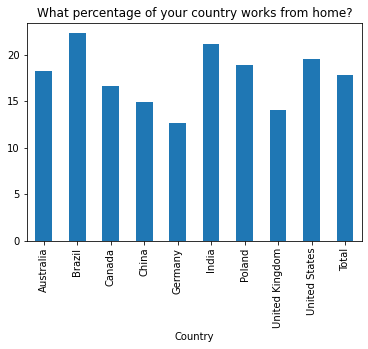

In [420]:
#We plot a bar chart of 
Remote.plot(kind='bar')
plt.title("What percentage of your country works from home?");

Evaluation: If we analize the data we notice that United States, Brazil, India and Poland are above the total for this Top 10 group of 17.4% and the total for the full group of countries which is 18.4%.

The four countries that are above the average are on 4 different continents. Australia lies between the two totals of the group of 10 and the total group. The 5 that lie below are from the same continents as the 4 above the average.

One can therefore safely say that there seems to be no relation between the continent that a respondent is from, although it seems if you combine United States and Canada it might be higher than the average of the 3 European countries in the study. This takes us to our next question:

# Question 3

Are the countries in Western Europe, Sweden, France, Italy, etc. less likely than a world average to allow workers to work remotely or from home?

In [421]:
'''
    INPUT - df - pandas dataframe with the responses from the Stack overflow survey
            a list of countries that representroughly 60% of the respondents
    OUTPUT - 
            A table with two columns that contains the percentages of the totals of the 2 categories within Western European countries
'''
filt2 = df_emp_filt[df_emp_filt.Country.isin(["Austria","Belgium","Denmark","Finland","France","Germany","Italy","Luxembourg","Netherlands","Norway","Portugal","Spain","Sweden","United Kingdom"])]

In [422]:
Table2=pd.crosstab(index= filt2.Country, 
            columns= filt2.Remote_percent, 
            values= filt2.Country, 
            aggfunc = len, 
            margins=True,
            margins_name='Total',
            normalize= 'index').mul(100)
Table2

Remote_percent,Half and more,Less than half
Country,,
Austria,14.797136,85.202864
Belgium,8.146067,91.853933
Denmark,12.030075,87.969925
Finland,20.564516,79.435484
France,14.930325,85.069675
Germany,12.658913,87.341087
Italy,22.324159,77.675841
Luxembourg,10.344828,89.655172
Netherlands,13.458950,86.541050


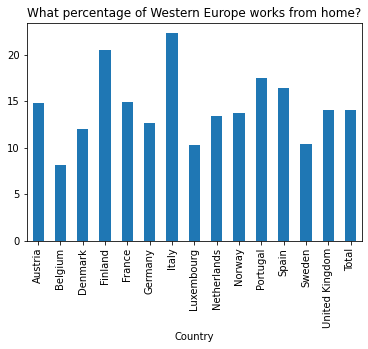

In [423]:
Remote2=Table2["Half and more"]
Remote2.plot(kind='bar')
plt.title("What percentage of Western Europe works from home?");

Evaluation: Althought the average of the Western European countries is less than the worldwide and Top 10 averages, one can clearly notice that some, e.g. Italy and Finland are well above the averages. It is therefore safe to say that Western Europe cannot be used to predict if less than average remote work is done. What may be possible to say that someone from Sweden is less likely to work from home, or remotely, than someone from Finland.

It will be interesting to see after Covid-19, how the percentages will be affected.


# 5. Modeling

Seeing that machine learning models can only use numeric data, we will use the 1/0 method to change the datatype, for the columns that we will use, to 1's and 0's. First, we will look at the aggregated numbers of EmploymentStatus boken down into the 2 columns of Remote_percent to see if we can see a relation between the two.

In [425]:
df_emp_filt.groupby(['Remote_percent', 'EmploymentStatus']).size().to_frame('size')
#df_emp_filt.info()#head()                                                                                         

size
Remote_percent EmploymentStatus                                         
Half and more  Employed full-time                                   4397
               Employed part-time                                    799
               Independent contractor, freelancer, or self-emp...   3381
Less than half Employed full-time                                  31751
               Employed part-time                                   2381
               Independent contractor, freelancer, or self-emp...   1852

From the above we can see that a bigger part of the 'Independent contractor, freelancer, or self-employed' group falls in the remote worker group (more than half), while the larger part of the 'Employed full-time' group falls into the group that does not work remotely. With EmploymentStatus, therefore, we can make the hypothesis that it seems as if it can be used to predict remote work.

We will use a linear model. Seeing that models can only use numeric data, we will use the 1/0 method on the categorical columns to dummy columns and populate them with 1's and 0's. First, we will have a look to see what data type our columns are. All four of the columns are of the object data type, therefore we create dummy columns and values for them. 

In [426]:
df_emp_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44561 entries, 1 to 51391
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Respondent           44561 non-null  int64  
 1   Professional         44561 non-null  object 
 2   ProgramHobby         44561 non-null  object 
 3   Country              44561 non-null  object 
 4   University           44561 non-null  object 
 5   EmploymentStatus     44561 non-null  object 
 6   FormalEducation      44561 non-null  object 
 7   MajorUndergrad       39672 non-null  object 
 8   HomeRemote           43996 non-null  object 
 9   CompanySize          38917 non-null  object 
 10  CompanyType          38821 non-null  object 
 11  YearsProgram         44349 non-null  object 
 12  YearsCodedJob        39754 non-null  object 
 13  YearsCodedJobPast    732 non-null    object 
 14  DeveloperType        35318 non-null  object 
 15  WebDeveloperType     10506 non-null 

In [427]:
'''
        INPUT - df - pandas dataframe df_emp_filt
            
        OUTPUT - 
            A new dataframe df_dummies_full that contains the dummy columns as well as the object type columns
            Three columns gets dummies: Remote_percent,EmploymentStatus, CompanySize
            Dummy columns with unique values as headings with the original name as prefix  
            The new datatype should be uint8
            
'''
#We use the get get_dummies method to 
df_dummies_full=pd.get_dummies(df_emp_filt, columns=['Remote_percent','EmploymentStatus','CompanySize'], prefix=('Remote_percent','EmploymentStatus','CompanySize'), prefix_sep='_')#, drop_first=True)

# We look at the data to see the new columns that are created
df_dummies_full.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44561 entries, 1 to 51391
Data columns (total 34 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Respondent                                                             44561 non-null  int64  
 1   Professional                                                           44561 non-null  object 
 2   ProgramHobby                                                           44561 non-null  object 
 3   Country                                                                44561 non-null  object 
 4   University                                                             44561 non-null  object 
 5   FormalEducation                                                        44561 non-null  object 
 6   MajorUndergrad                                                         39672 non-null 

We notice from the query above that the dummy columns have been created correctly with the correct numerical datatype of uint8.We also notice that the NA values have been filled, which is in order for our study.

We now create a new dataframe that only contain the numerical datatype uint8 for our model.

In [428]:
#Create a new df uint_df that only contain the numerical datatype uint8.
uint_df = df_dummies_full.select_dtypes(include=['uint8'])

# We look at the data to see that only dummy columns remain in the newly created df uint_df
uint_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44561 entries, 1 to 51391
Data columns (total 15 columns):
 #   Column                                                                 Non-Null Count  Dtype
---  ------                                                                 --------------  -----
 0   Remote_percent_Half and more                                           44561 non-null  uint8
 1   Remote_percent_Less than half                                          44561 non-null  uint8
 2   EmploymentStatus_Employed full-time                                    44561 non-null  uint8
 3   EmploymentStatus_Employed part-time                                    44561 non-null  uint8
 4   EmploymentStatus_Independent contractor, freelancer, or self-employed  44561 non-null  uint8
 5   CompanySize_1,000 to 4,999 employees                                   44561 non-null  uint8
 6   CompanySize_10 to 19 employees                                         44561 non-null  uint8
 7   Comp

In [429]:
#Split your data into explanatory and response variables or into an X matrix and a response vector y
y = uint_df[['Remote_percent_Half and more','Remote_percent_Less than half']]
X = uint_df.drop(['Remote_percent_Half and more','Remote_percent_Less than half'], axis=1)#, inplace=True)

We have a quick look at our y values to ensure that it's correct:

In [430]:
y.head()

,Remote_percent_Half and more,Remote_percent_Less than half
1,1,0
2,0,1
3,0,1
4,0,1
6,0,1


In the next six lines of code, we will run the statistical model and print out the results:

In [431]:
 '''
    INPUT:
    df - a dataframe holding all the variables of interest of Dtyoe uint8
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    The lines of code below should:

    1. Create training and test sets of data
    2. Instantiate a LinearRegression model with normalized data
    3. Fit your model to the training data
    4. Predict the response for the training data and the test data
    5. Obtain an rsquared value for both the training and test data
    6. Print the scores
 '''
# Create training and test sets of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
                                                    
#Instantiate
lm_model = LinearRegression(normalize=True) 

#Fitthe model
lm_model.fit(X_train, y_train) 

#Predict using our model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using our model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.20370841947313156.  The rsquared on the test data was 0.1784194366592911.


Let us see if we can get a better score by focusing on the EmploymentStatus only as we noticed before that there seems to be a relationship.

In [432]:
df_dummies_full=pd.get_dummies(df_emp_filt, columns=['Remote_percent','EmploymentStatus'], prefix=('Remote_percent','EmploymentStatus'), prefix_sep='_')#, drop_first=True)
df_dummies_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44561 entries, 1 to 51391
Data columns (total 25 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Respondent                                                             44561 non-null  int64  
 1   Professional                                                           44561 non-null  object 
 2   ProgramHobby                                                           44561 non-null  object 
 3   Country                                                                44561 non-null  object 
 4   University                                                             44561 non-null  object 
 5   FormalEducation                                                        44561 non-null  object 
 6   MajorUndergrad                                                         39672 non-null 

In [433]:
uint_df = df_dummies_full.select_dtypes(include=['uint8'])
uint_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44561 entries, 1 to 51391
Data columns (total 5 columns):
 #   Column                                                                 Non-Null Count  Dtype
---  ------                                                                 --------------  -----
 0   Remote_percent_Half and more                                           44561 non-null  uint8
 1   Remote_percent_Less than half                                          44561 non-null  uint8
 2   EmploymentStatus_Employed full-time                                    44561 non-null  uint8
 3   EmploymentStatus_Employed part-time                                    44561 non-null  uint8
 4   EmploymentStatus_Independent contractor, freelancer, or self-employed  44561 non-null  uint8
dtypes: uint8(5)
memory usage: 1.8 MB


In [434]:
 '''
 
    INPUT:
    uint_df - a dataframe holding all the variables of interest of Dtyoe uint8
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the training data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    The lines of code below should:

    1. Split our data into an X matrix and a response vector y
    2. Create training and test sets of data
    3. Instantiate a LinearRegression model with normalized data
    4. Fit your model to the training data
    5. Predict the response for the training data and the test data
    6. Obtain an rsquared value for both the training and test data
    7. Print the scores
 '''
#Split into explanatory(X) and response(y) variables
y = uint_df[['Remote_percent_Half and more','Remote_percent_Less than half']]
X = uint_df.drop(['Remote_percent_Half and more','Remote_percent_Less than half'], axis=1)#, inplace=True)

#Split into train and test Create training and test sets of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
                                                    
#Instantiate
lm_model = LinearRegression(normalize=True) 

#Fitthe model
lm_model.fit(X_train, y_train) 

#Predict using our model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using our model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.19142358430627415.  The rsquared on the test data was 0.16412884197168387.


In conclusion, we can see that we get a slightly better score when we add CompanySize to EmploymentStatus in our model. If we add too many we will most likely be overfitting, therefore it is important to find the most applicable columns to prodict the response.